# Mecanismos de datos faltantes

### **_Importación de librerías_**

In [13]:
import janitor
import pandas as pd
import pandas_missing_extension_
import numpy as np
import missingno

_Lectura de csv_

In [14]:
df = pd.read_csv('datos.csv')

_Estandarización de datos faltantes_

In [15]:
df.replace(['desconocido','-999','na'], np.nan, inplace=True)

In [16]:
print(df)

    id_estudiante tipo_escuela   asignatura horas_estudio_semanales  \
0               1      Pública  Matemáticas                     NaN   
1               1      Pública     Ciencias                       8   
2               2      Privada  Matemáticas                      10   
3               2      Privada     Ciencias                       7   
4               3      Pública  Matemáticas                       5   
5               3      Pública     Ciencias                     NaN   
6               4      Privada  Matemáticas                      12   
7               4      Privada     Ciencias                     NaN   
8               5      Privada  Matemáticas                      15   
9               6      Pública  Matemáticas                     NaN   
10              6      Pública     Ciencias                       4   
11              7      Pública  Matemáticas                       6   
12              7      Pública     Ciencias                       5   
13    

_Conversión de datos faltantes implícitos a explícitos_

In [17]:
df_wide = (
    df.pivot_wider(
        index = 'id_estudiante',
        names_from = 'asignatura',
        values_from = 'calificacion_final'
    )
)
print(df_wide)

   id_estudiante  Ciencias  Matemáticas
0              1      75.0          NaN
1              2      88.0         92.0
2              3      72.0         65.0
3              4      89.0         95.0
4              5       NaN         98.0
5              6       NaN         55.0
6              7      70.0          NaN
7              8      91.0          NaN
8              9      62.0         58.0
9             10      85.0         90.0


/home/fcisnerosr/miniforge3/envs/datos_faltantes/lib/python3.9/site-packages/pandas_flavor/register.py:164: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.pivot` instead.
  return method(self._obj, *args, **kwargs)


_Visualizar datos faltantes_

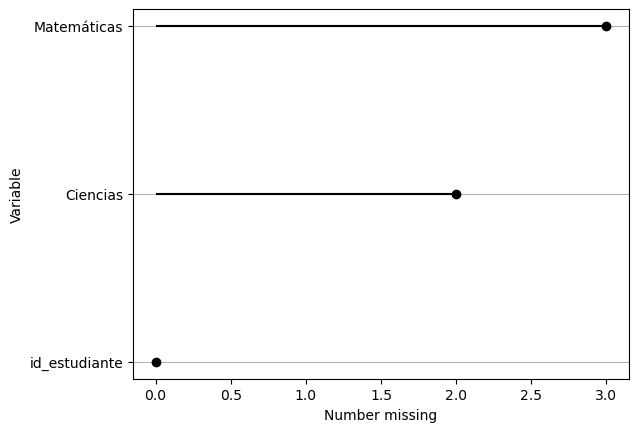

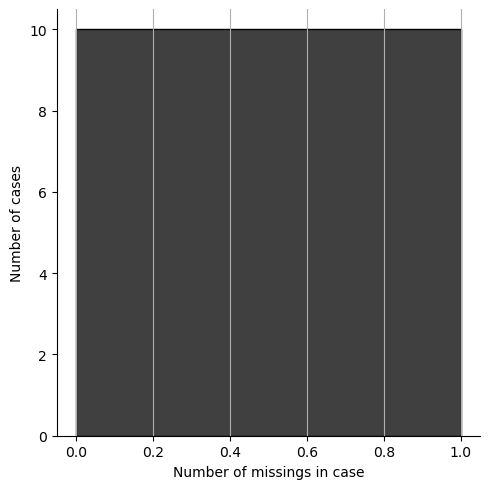

In [18]:
df_wide.missing.missing_variable_plot()

In [19]:
(
    df_wide
    .missing
    .sort_variables_by_missingness()
)

,Matemáticas,Ciencias,id_estudiante
0,NaN,75.0,1
1,92.0,88.0,2
2,65.0,72.0,3
3,95.0,89.0,4
4,98.0,NaN,5
5,55.0,NaN,6
6,NaN,70.0,7
7,NaN,91.0,8
8,58.0,62.0,9
9,90.0,85.0,10


_Verificacion de que si es un MCAR_

<AxesSubplot:>

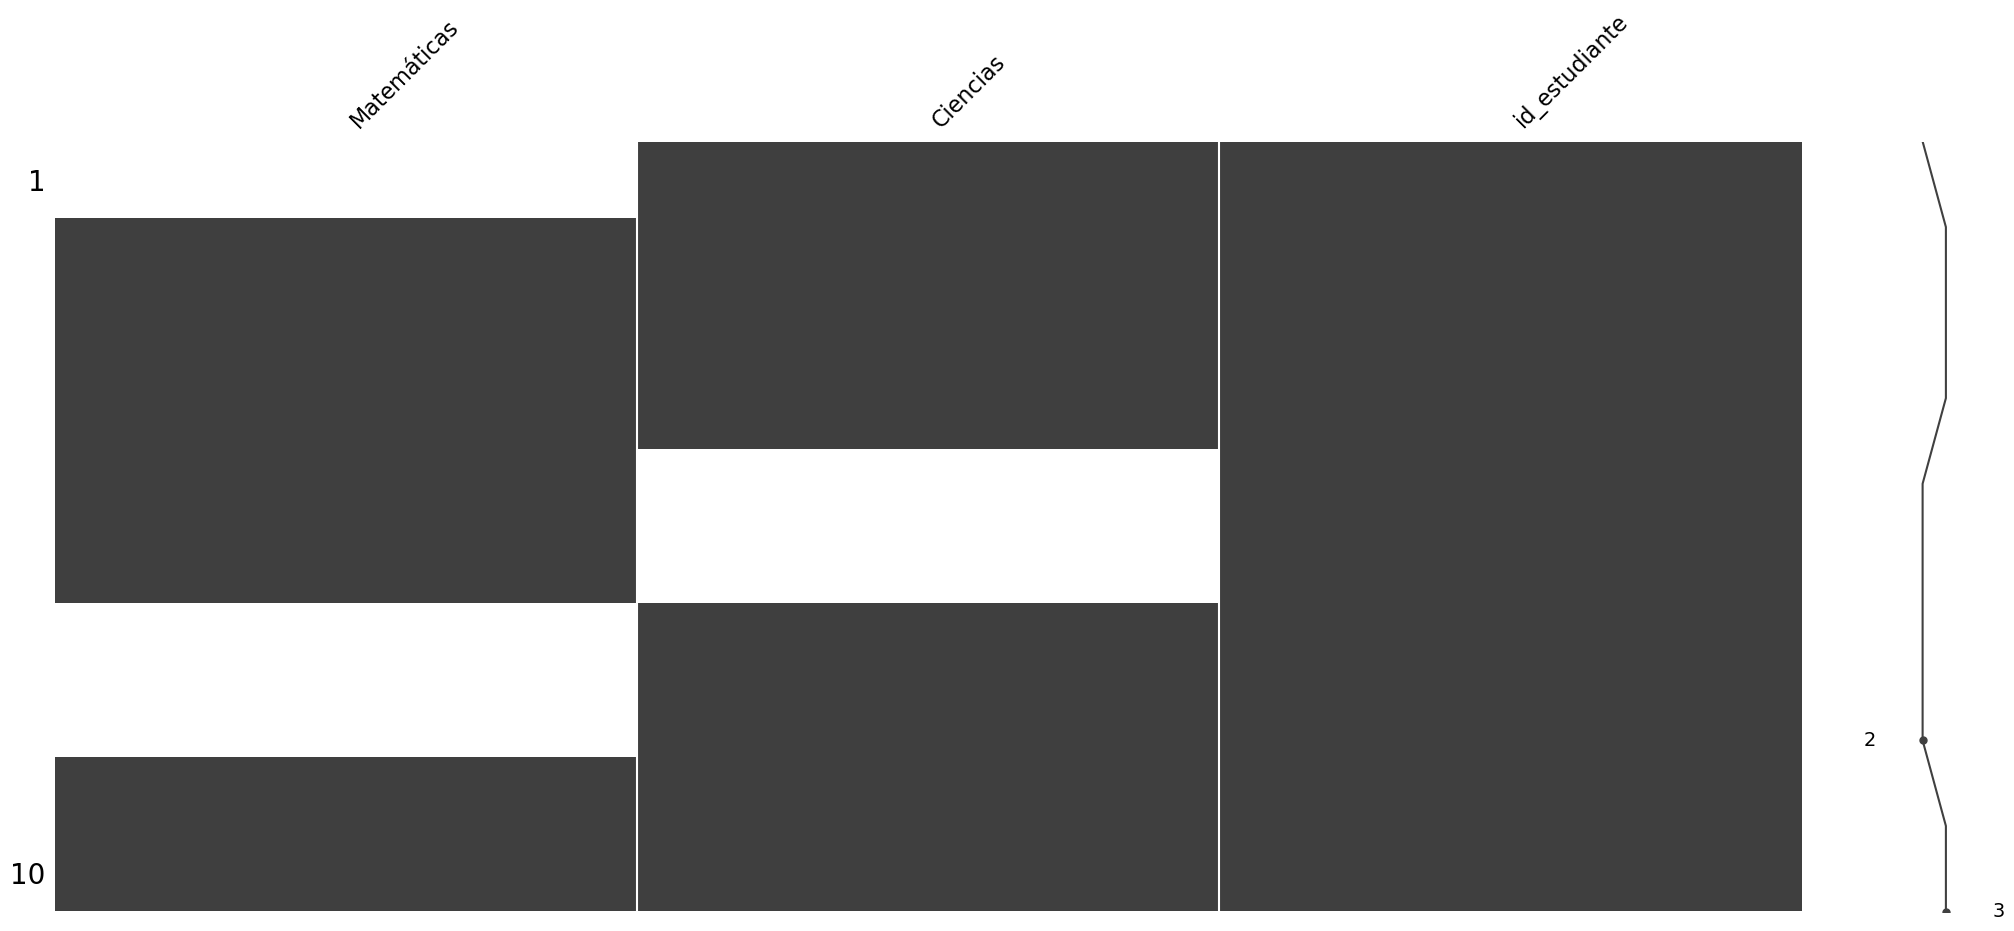

In [23]:
(
    df_wide
    .missing
    .sort_variables_by_missingness()
    .pipe(missingno.matrix)
)

_Verficicacion de MAR_